# From Genomes to Traits: Reverse Ecology of Uncultivated Freshwater Actinobacteria

### Background and Preliminary Data

#### Trait-Based Ecology
Microbes are critical players in all ecosystems, where they support essential ecosystem functions. While microbes have tremendous influence on ecosystems, microbial ecologists do not have robust approaches to translate microbial-level observations to ecosystem-scale predictions. A better understanding of the microbial contribution to ecosystem behavior will enable more accurate predictions of ecosystem response to drivers such as climate change, as well as the impact these changes will have on ecosystem functions.

Trait-based approaches represent a promising approach for achieving such an understanding: their focus on the measurable properties of an organism (e.g., amino acid requirements, pH sensitivity) enables a mechanistic understanding of species-environment relationships. As a result, the application of trait-based approaches to microbial ecology has the potential to produce generalizable principles that elevate descriptive and correlative studies to a predictive level.

Bacterial communities in freshwater lakes are compelling model systems for which to develop a scaled-up understanding, as these bacteria drive the cycling of most biologically active elements in their ecosystems. In addition, existing heterogeneous datasets, laboratory experiments, and field observations contain a tremendous amount of information about the composition, dynamics, and environmental context of freshwater microbial communities. Of the freshwater bacteria, Actinobacteria are often the numerically dominant phylum, with phylotypes exhibiting contrasting dynamics through time. Nonetheless, the genetic basis underlying this niche partitioning remains unclear. As a result, the Actinobacteria represent a model phylum for linking genomic content to relevant microbial traits.

#### Preliminary Data
The McMahon laboratory has learned a tremendous amount about the ecology of freshwater lake bacteria in the past decade. They have developed a curated taxonomy for freshwater microbes, which uses a controlled nomenclature of phylum/lineage/clade/tribe to classify microbes based on 16S rRNA sequences. A total of 79 tribes have been identified, with the Actinobacteria comprising nine lineages, 14 clades, and 32 tribes. Some tribes seem to niche partition based on pH and water chemistry (associated with carbon source, terrestrial vs. aquatic).

The McMahon laboratory and collaborators have sequenced 46 single-cell amplified genomes (SAGs) from Lake Mendota and Trout Bog (Vilas County, WI). They have also sequenced 97 shotgun metagenomes from Lake Mendota, and 90 shotgun metagenomes from Trout Bog. More than 200 draft genomes have been assembled from the metagenomes (GFMs). These data are archived digitally with the public JGI-IMG platform and also through the NTL-LTER public database. Using phylogenetic analysis, I have identified and classified a total of 51 genomes (SAGs+GFMs) belonging to members of the Actinobacteria).

####References
1. Green JL, Bohannan BJM, Whitaker RJ (2008) Microbial biogeography: from taxonomy to traits. Science 320: 1039–1043.
2. Levy R, Borenstein E (2012) Reverse Ecology: From Systems to Environments and Back. In: Soyer OS, editor. Advances in Experimental Medicine and Biology. Advances in Experimental Medicine and Biology. New York, NY: Springer New York, Vol. 751. pp. 329–345.
3. Newton RJ, Jones SE, Eiler A, McMahon KD, Bertilsson S (2011) A guide to the natural history of freshwater lake bacteria. Microbiol Mol Biol Rev 75: 14–49.

### Reverse Ecology

The term reverse ecology refer to a set of computational techniques which aim to infer the ecological traits of an organism directly from its metabolic network. The "flavor" of reverse ecology used in this work relies on the computation of two metabolic network properties, the "seed set" and the "expansion set." The seed set represents the minimal set of metabolites which must be exogenously acquired for growth. These are typically non-unique and can identify the range of nutrient sources used by an organism, as well as those substrates that can substitute for one another.  The expansion set represents the total set of metabolites an organism can synthesize given a set of exogenous metabolites. The two sets of compounds will reveal auxotrophies and biosynthetic capabilities that define metabolic phenotypes for each tribe. 

Furthermore, by comparing seed and expansion sets for each tribe, I can calculate a number of other metrics, including the environmental scope index (ESI) and the cohabitation score (CHS). ESI correlates with environmental flexibility (high ESI scores denote generalists and low scores denote specialists), while CHS measures the amount of competition a species could expect from other organisms. I will also compute the effective metabolic overlap (EMO) between each pair of tribes. The EMO measures the robustness of an organism to competition from other organisms, and EMO scores have been shown to positively correlate with inter-species competition and negatively correlate with growth rates. These metrics will illuminate each tribe’s ecological traits, such as niche (specialist vs. generalist) and robustness to competition.

### Graph Theory
Reverse ecology represents metabolic networks as graphs (a type of mathematical object). A graph consists of a set of objects (nodes) that are connected to one another (via edges). Graphs may be directed or undirected. In an undirected graph, a connection from A to B implies a connection from B to A. In a directed graph, edges point from A to B and not vice-versa. Metabolic networks are represented as directed graphs.

For the purposes of computation, graphs can be represented via a variety of data structures. In this work, graphs are represented as adjacency lists. The first column of the adjacency list gives the node, and the second column gives the nodes to which the first node points. The figure below shows a directed graph and its adjacency list representation.

![A graph and its adjacency list](files/imageFiles/RE-graphAdjList.png)

### Reverse Ecology Metrics

**This section will be updated as I compute new metrics.**

#### Seed Set
The fundamental "unit" of reverse ecology is a seed set. For a metabolic network, the seed is formally defined as "the minimal subset of the occurring compounds that cannot be synthesized from other compounds in the network (and hence are exogenously acquired) and whose existence permits the production of all other compounds in the network." For a metabolic network represented as a directed graph, the seed set is the minimal subset of nodes required to access every node in the network. In the directed graph below, nodes A and H represent a seed set of the network.

![Path from nodes A and H to all nodes](files/imageFiles/RE-graphSeedSetsAH.png)

Some seeds may be "equivalent:" that is, you can start from multiple seeds and reach the same nodes. In the graph shown above, the same nodes can be reached from starting nodes F, G, or H (shown below). In the absence of any other evidence, all three are equally likely to be a seed metabolite, so each of these compounds is assigned a weight of 1/3 (shown below).

![Path from nodes A and {F, G} to all nodes](files/imageFiles/RE-graphSeedSetsAFG.png)

Reference: Borenstein, E., & Feldman, M. W. (2009). Topological signatures of species interactions in metabolic networks. Journal of Computational Biology, 16(2), 191–200.

#### Expansion Set and Scope

Reference: Ebenhoh 2004

#### Metabolic Competition and Metabolic Complementarity

Metabolic competition represents the similarity in two organisms' nutritional profiles, and represents the potential for competition between the two organisms. The seed set of each organism's metabolic network is used as a proxy for its nutritional profile. For two organisms A and B, the metabolic competition index is calculated as the fraction of compounds in A's seed set that are also present in B's seed set. Because individual seed compounds have weights assigned to them, the fraction is calculated as a normalized weighted sum. This index provides an upper bound for the amount of competition species A could encounter from species B.

Metabolic complementarity represents the complementarity in two organisms’ nutritional profiles, and represents the potential for syntrophy between A and B. Again, the seed set of each organism's metabolic network is used as a proxy for its nutritional profile. For two organisms A and B, the metabolic complementarity index is calculated as the fraction of compounds in A's seed set that are present in B's metabolic network, _but are not a part of B's seed set_ (e.g, B's 'non-seed' compounds). This index provides an upper bound for the potential for syntrophic interactions between A and B.

Note that neither of these indices are symmetric.

The figure below illustrates metabolic competition and metabolic complementarity.

![Illustration of metabolic competition and metabolic complementarity](files/imageFiles/RE-CoopComp.png)

Each panel shows the metabolic networks of two organisms represented as a directed graph. The shaped nodes represent exogenously acquired metabolites (seeds). **(A)** Metabolic competition. The brackets indicate the four and five seed nutrients exogenously acquired by the ellipse- and rectangle-shaped organisms, respectively. The two metabolites enclosed in a dashed rectangle are shared nutrients for which the organisms may compete. The metabolic competition index for the first organism in the presence of the second is 2/4, while the index of the second organism in the presence of the second is 2/4, whereas the competition index of the second species in the presence of the first is 2/5. **(B)** Metabolic complementarity. The compounds enclosed in a dashed rectangle denote nutrients required by the second organism that can be synthesized by the first organism. The metabolic complementarity index for the second species in the presence of the first is 3/5.

Reference: Levy, R., & Borenstein, E. (2013). Metabolic modeling of species interaction in the human microbiome elucidates community-level assembly rules. Proceedings of the National Academy of Sciences, 110(31), 12804–12809.

#### Environmental Scope Index

Reference: Freilich et al Genome Biol 2009

#### Cohabitation Score

Reference: Freilich et al Genome Biol 2009

#### Effective Metabolic Overlap

Reference: Freilich et al Nucl Acids Res 2010

#### References - Metabolic Networks and Graph Theory
1. Jeong, H., Tombor, B., Albert, R., Oltvai, Z. N., & Barabási, A.-L. (2000). The large-scale organization of metabolic networks. Nature, 407(6804), 651–654.
2. Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to Algorithms (3rd ed.). MIT Press.

#### References - Reverse Ecology
1. Borenstein, E., & Feldman, M. W. (2009). Topological signatures of species interactions in metabolic networks. Journal of Computational Biology, 16(2), 191–200.
2. Borenstein, E., Kupiec, M., Feldman, M. W., & Ruppin, E. (2008). Large-scale reconstruction and phylogenetic analysis of metabolic environments. Proceedings of the National Academy of Sciences, 105(38), 14482–14487.
3. Carr, R., & Borenstein, E. (2012). NetSeed: a network-based reverse-ecology tool for calculating the metabolic interface of an organism with its environment. Bioinformatics, 28(5), 734–735.
4. Ebenhöh, O., Handorf, T., & Heinrich, R. (2004). Structural analysis of expanding metabolic networks. Genome Informatics, 15(1), 35–45.
5. Freilich, S., Kreimer, A., Borenstein, E., Yosef, N., Sharan, R., Gophna, U., & Ruppin, E. (2009). Metabolic-network-driven analysis of bacterial ecological strategies. Genome Biology, 10(6), R61.
6. Freilich, S., Kreimer, A., Meilijson, I., Gophna, U., Sharan, R., & Ruppin, E. (2010). The large-scale organization of the bacterial network of ecological co-occurrence interactions. Nucleic Acids Research, 38(12), 3857–3868.
7. Handorf, T., Ebenhöh, O., & Heinrich, R. (2005). Expanding metabolic networks: Scopes of compounds, robustness, and evolution. Journal of Molecular Evolution, 61(4), 498–512.
8. Kreimer, A., Dorrestein, P. C., Borenstein, E., & Freilich, S. (2012). NetCmpt: a network-based tool for calculating the metabolic competition between bacterial species. Bioinformatics, 28(16), 2195–2197.
9. Levy, R., & Borenstein, E. (2012). Reverse Ecology: From Systems to Environments and Back. In O. S. Soyer (Ed.), Advances in Experimental Medicine and Biology (Vol. 751, pp. 329–345). New York, NY: Springer New York.
10. Levy, R., & Borenstein, E. (2013). Metabolic modeling of species interaction in the human microbiome elucidates community-level assembly rules. Proceedings of the National Academy of Sciences, 110(31), 12804–12809.

### Phylogenetic Reconstruction

Maximum-likelihood estimation was used to build a phylogenetic tree of the 51 SAGs and GFMs in the phylum Actinobacteria. The tree was constructed using RAxML using concatenated alignments of 400 marker genes (from Phylophlan). Organisms were classified using a "guilt by association" approach, in which GFMs were assumed to belong the same lineage/clade/tribe/ as a SAG if they share a parent node w/ that SAG.

Lucky for us we can import image files into this iPython notebook:
![Phylogenetic Tree](files/imageFiles/2014-12-01 Actinos Tree-RAxML.png)

####References
1. Stamatakis A (2014) RAxML version 8: a tool for phylogenetic analysis and post-analysis of large phylogenies. Bioinformatics 30: 1312–1313.
2. Segata N, Börnigen D, Morgan XC, Huttenhower C (2013) PhyloPhlAn is a new method for improved phylogenetic and taxonomic placement of microbes. Nat Commun 4: 2304.

####TO DO
1. Update tree w/ genomes for SAGs from CSP394 after performing auto-decontamination with ProDeGe.
2. Add new actino genomes from CSP 1329.
3. Use Python package [ETE](http://etetoolkit.org/download/) to construct phylogenetic tree instead of using R.

### Genome Statistics

Genome metadata were downloaded from IMG and processed using a combination of R and Microsoft Excel. Genome completeness was estimated based on presence/absence of the 139 essential genes from the "microbial dark matter." Gene presence/absence was predicted based on COG categories. Here is the summary table I presented at JGI:

![Genome metadata](files/imageFiles/ActinoGenomeStats.png)

In the interest of reproducibility, I would like to write a script to make this figure from the raw data from IMG.

####References
1. Rinke C, Schwientek P, Sczyrba A, Ivanova NN, Anderson IJ, et al. (2013) Insights into the phylogeny and coding potential of microbial dark matter. Nature 499: 431–437.

####TO DO
1. Translate original workflow into Python, acting directly on metadata exported from IMG.
2. Perform a "proper" genome completeness estimate using HMMs, instead of COG categories.
3. Update w/ new SAGs from CSP 1329.

### From Genomes to Network Reconstructions
The first step in a reverse ecology analysis is to construct a metabolic network for the organism of interest. Metabolic networks are often represented as a genome-scale, metabolic network reconstruction (GENRE), astructured collections of the biochemical transformations occuring within a particular organism. The conversion of a GENRE into a mathametical format enables myriad downstream (computational) systems biology analyses.

GENREs of our 51 actinobacterial SAGs and GFMs were built using the Department of Energy's Systems Biology Knowledgebase, [KBase](http://kbase.us/). From an un-annotated set of contigs in FASTA format, KBase performs a genome annotation (using RAST) and constructs a GENRE (using the Model SEED). FASTA files for our genomes were downloaded from zissou.bact.wisc.edu (Zissou) on November 16, 2014. GENREs built by KBase were exported in SBML format, a widely-used standard.

GENREs were built through KBase's command-line IRIS interface. I wrote a bash script to construct GENREs for our genomes in batch mode. The IRIS interface has since been deprecated in favor of the graphical Narrative interface. There is also a new (undocumented) API which provides programmatic Python access to the KBase functions. I have been in contact with the KBase development team regarding the API, and plan to recreate my old workflow in the new interface.

####References:
1. Thiele I, Palsson BØ (2010) A protocol for generating a high-quality genome-scale metabolic reconstruction. Nat Protoc 5: 93–121.
2. Aziz RK, Bartels D, Best AA, DeJongh M, Disz T, et al. (2008) The RAST Server: rapid annotations using subsystems technology. BMC Genomics 9: 75.
3. Henry CS, DeJongh M, Best AA, Frybarger PM, Linsay B, et al. (2010) High-throughput generation, optimization and analysis of genome-scale metabolic models. Nat Biotechnol 28: 977–982.

####TO DO
1. Create new KBase Narrative for batch generation of GENREs from unannotated genomes.
2. Recreate GENREs for SAGs from CSP394 after performing auto-decontamination with ProDeGe.
3. Add new actino genomes from CSP 1329. I am waiting until I have the new KBase narrative working so I don't have to build them manually one-by-one.

### Comparison of KBase to IMG Annotations
Our lab uses the Department of Energy Joint Genome Institute (JGI)'s Integrated Microbial Genomes (IMG) database/software platform to house and annotate our genomes. Because KBase uses its own annotations for GENRE construction, we wanted to confirm that genome annotations from RAST/KBase are comparable to those from IMG.

For this analysis, I selected the L06 SAG published by Sarahi (Garcia et al ISME J 2013). This SAG is estimated to be > 99% complete, so if you wanted to build a high-quality network model it would be a good candidate due to being a nearly-complete genome. The comparison was done using Microsoft Excel. Here is the summary e-mail I sent to Trina:

I first looked at ORF calls between the two annotation pipelines, and of all ~1300 identified ORFs, the two pipelines agreed in start/sop sites (not annotation) in over 90% of cases. IMG identified slightly more ORFs, mostly at the ends of contigs. The Kbase model contained 333 (27%) of these ORFs (e.g., Kbase could identify a metabolic activity associated with the ORF). This is very typical for a draft metabolic model, and the latest E. coli model only contains ~30% of all ORFs.

I then compared the IMG and Kbase annotations in more detail, to get a feel for how manual curation might improve the content of the draft model. I estimate the draft model could be expanded with an additional 70 annotations (21% more genes), and the annotations of 47 genes (14%) might get revised. Thus, I have high confidence in about 85% of the annotations in the draft model, and believe it represents a large subset of the total metabolic activity in the genome. Obviously this represents a best-case scenario since the L06 SAG is nearly complete and well-annotated, and I'm considering looking at another genome to see if the draft models get worse.

I am satisfied to proceed with the analysis using unrefined Kbase models, as "draft" models are used in large-scale ecological analyses frequently. Later on, it might be interesting to use a curated model of the L06 SAG and see how RE metrics compare to the draft model.

####References
1. Garcia SL, McMahon KD, Martinez-Garcia M, Srivastava A, Sczyrba A, et al. (2013) Metabolic potential of a single cell belonging to one of the most abundant lineages in freshwater bacterioplankton. ISME J 7: 137–147.

### Processing of KBase GENREs
The Systems Biology Markup Language (or [SBML](http://sbml.org/)) is a standard format for publication of GENREs. Because the SBML standard is still evolving, not all software platforms support the same version of the standard. Such is the case for KBase and the widely-adopted COBRA Toolbox. Due to its popularity, I wanted to ensure our SBML files were compliant with the version of SBML used by COBRA. To this end, I developed a set of Matlab scripts to perform necessary processing of our SBML files from KBase. The scripts perform the following tasks:
* Import metabolite charges
* Check mass- and charge-balancing
* Import free energy data and assign reaction directions

In addition, KBase GENREs contain some additional reactions which need to be removed prior to Reverse Ecology analysis. The scripts thus remove the following reactions:
* Remove: biomass, exchange, spontaneous, and DNA/RNA biosynthesis
* Remove DNA/RNA biosynthesis
* Adhere to COBRA naming conventions

####References
1. Schellenberger J, Que R, Fleming RMT, Thiele I, Orth JD, et al. (2011) Quantitative prediction of cellular metabolism with constraint-based models: the COBRA Toolbox v2.0. Nat Protoc 6: 1290–1307.
2. Ebrahim A, Lerman JA, Palsson BØ, Hyduke DR (2013) COBRApy: COnstraints-Based Reconstruction and Analysis for Python. BMC Syst Biol 7: 74.

####TO DO
1. The COBRA toolbox was originally developed in Matlab, and has recently been ported to Python. I plan to re-implement my Matlab workflow in Python, since Python is used by KBase and for Reverse Ecology analysis.
2. This stage still has a manual step to mass- and charge-balance some tricky reactions. I will update the script to perform the necessary manipulations.

#### Reverse Ecology Using Python

I am developing a workflow in Python to carry out reverse ecology analysis. I am using the Spyder IDE, which does not "play nice" with iPython notebook, which I am using to create this document. For now, I have copied my code from Spyder into this notebook manually. I plan to break my Spyder workflow into individual scripts, so I can call them indiviudally from iPython.

First we need to import required packages and modules. This code cell also creates a list of models to be analyzed.

In [1]:
# Preliminaries
# This cell imports the packags and modules used throughout this notebook and
# creates the list of genomes to process. The user is allowed to define their
# local folder structure for data input and processing.

# Import Python packages.
# The packages 'cobra', 'networkx', 'numpy', and 'matplotlib' may not be 
# included with your Python distribution. They can be installed using pip. For
# more information, visit:
#   cobra: http://github.com/opencobra/cobrapy, used to process output from KBase
#   networkx: http://networkx.github.io/, used to perform graph analyses form which
# seed sets and scopes are computed
#   numpy: http://www.numpy.org/, adds support for matrices and arrays
#   matplotlib: http://matplotlib.org/, used for plotting
import cobra
import itertools
import os, glob
import networkx as nx
import numpy as np
import sys
%matplotlib inline
from matplotlib import pyplot

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. They include functions for working with the SBML models from 
# KBase (sbmlFunctions and their graph representations (graphFunctions).
sys.path.append('../Python')
import sbmlFunctions as sf
import graphFunctions as gf

# Define data directories
# The user should ensure these directories match their data organization scheme
# processedDataDir: directory containing a folder for each genome. The folder
# name should match the genome name, and should contain a genome-scale model
# of the genome. The model should be named 'genomeNameBalanced.xml'.
# summaryStatsDir: directory for storing summary statistics
processedDataDir = 'ProcessedModelFiles'
summaryStatsDir = 'DataSummaries'

# Retrieve list of genomes to process by examing the contents of 
# 'processedDataDir', ignoring hidden folders. Subsequent computations are 
# performed by iterating over this list.
dirList =[]
for item in os.listdir('../'+processedDataDir):
    if not item.startswith('.'):
        dirList.append(item)

numSubDir = len(dirList)

#### Converting KBase SBML files to Graphs

The first step in reverse ecology analysis is to convert the SBML representation of the metabolic network to a graph. The network is represented as a directed graph, where nodes denote and compounds and edges denote reactions. A directed edge from A to C indicates that compound A is a substrate in a reaction which produces compound B. That is, for a given reactions, all the nodes that represent its substrates are connected by directed edges to all the nodes that represent its products.

Thus, the following reaction
>A + B --> C + D

would have the following adjacency list representation:

>A | C, D  
>B | C, D  

Reactions in metabolic networks can be either reversible or irreversible. In an irreversible reaction, the products can only be converted to reactants in the direction as written. The above reaction is irreversible. In a reversible reaction, compounds on both sides of the reaction can be freely interconverted. Reversible reactions are denoted via a double-headed arrow.

Thus, the following reversible reaction
>A + B <--> C + D

would have the following adjacency list representation:

>A | C, D  
>B | C, D  
>C | A, B  
>D | A, B

The code below converts the SBML representations to adjacency lists.

In [2]:
# SBML to Adjacency List
# This cell converts each genome scale model from an SBML file to an adjacency
# list. An adjacency list is a collection of lists, one for each vertex in the
# graph, representing that vertex's connected edges. For more details, visit
# http://en.wikipedia.org/wiki/Adjacency_list
# Adjacency lists for each genome-scale model are written as text files in 
# each genome directory. Summary statistics about each graph are written in the
# summaryStatsDir as well.

# Create an array to store summary statistics. The array has three integer
# columns, which will contain the number of genes, metabolites, and reactions
# in the SBML file. 
modelStatArray = np.empty([numSubDir, 3], dtype = int)

# Create a file to record the summary statistics.
modelFile = open('../'+summaryStatsDir+'/'+'ModelStatistics.txt', 'w')
modelFile.write('Model,Genes,Metabolites,Reactions\n')

# Iterate over the list of genome directories. For each genome, read in the
# SBML file and update the 'description' field with the genome name. The number
# of genes, metabolites, and reactions in the SBML file is recorded in the
# 'modelStatArray' and written to 'modelFile.' Finally, the genome-scale model
# is converted to an adjacency list and written to file.
count = 0
print 'Converting SBML files to adjacency lists...'
for curDir in dirList:
# Read in SBML file    
    model = cobra.io.read_sbml_model('../'+processedDataDir+'/'+curDir+'/'+curDir+'Balanced.xml')
# Update description field
    model.description = curDir;
# Read model statistics by invoking sbmlFunctions.getModelStats
    modelStatArray[count:] = sf.getModelStats(model)
    modelFile.write('%s,%i,%i,%i\n' % ('../'+processedDataDir+'/'+curDir, modelStatArray[count,0], 
                                    modelStatArray[count,1], 
                                    modelStatArray[count, 2] ) )
# Create adjacency list and write to file
    sf.adjacencyListFromModel(model, processedDataDir)
    count = count + 1
modelFile.close()
print 'Conversion complete. Converted %s models.' % (numSubDir)

Converting SBML files to adjacency lists...
Conversion complete. Converted 51 models.


#### Analyze Graph Representations

In graph theory, a connected component of a graph is a subgraph in which all pairs of vertices are connected to each other by paths, and which has no connections to nodes outside the subgraph. The graph below has four connected components, each in a different color.

![Four connected components](files/imageFiles/RE-graphComponents.png)

A graph which has only a single component is fully connected. The graphs algorithms used in reverse ecology analysis require the metabolic network contain a single, fully connected graph. 

Oftentimes metabolic network graphs contain multiple components, so it's important to check the assumption of fully connectedness for our graphs. If the graphs are not fully connected, we have to decide what to do. Common choices are:
1. Discard all but the largest component.
2. Combine metabolic network graphs from closely-related organisms (tribes, in our case) and check that the new/larger graph is now connected.

The code below computes the connected components of our metabolic network graphs and makes a histogram.

Computing graph statistics...
Computation complete. Analyzed 51 graphs.


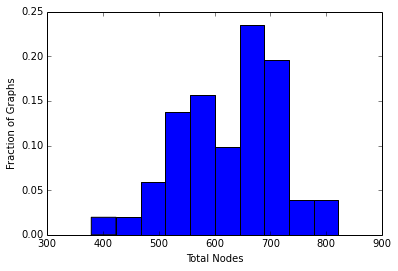

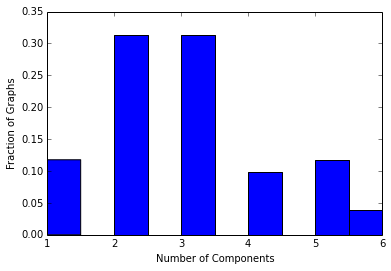

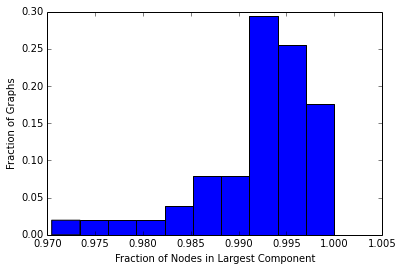

In [3]:
# Statistics on Adjacency Lists
# This cell reads in the adjacency lists from the previous step and creates
# graph and directed graph (digraph) representations of each list. The objects
# are created using the networkX package. Summary statistics for the graph
# and directed graph are also reported and written to file.

# Create arrays to store summary statistics. Each array has four integer
# columns, for different properties of the graph: number of nodes (metabolites),
# edges, total components, and size of the largest component.
graphStatArray = np.empty([numSubDir, 4], dtype = int)
diGraphStatArray = np.empty([numSubDir, 4], dtype = int)

# Create files to record the summary statistics.
graphFile = open('../'+summaryStatsDir+'/'+'GraphStatistics.txt', 'w')
graphFile.write('Model,Nodes,Edges,Total Components,Size of Largest\n')

diGraphFile = open('../'+summaryStatsDir+'/'+'DiGraphStatistics.txt', 'w')
diGraphFile.write('Model,Nodes,Edges,Total Components,Size of Largest\n')

# Create lists to store the graph and digraph objects
graphList = []
diGraphList = []

# Iterate over the list of genome directories. For each genome, read in the
# adjacency list and convert it to both a graph and a digraph. Retrieve 
# properties of the (di)graph and record in the appropriate array. Write these
# statistics to file.
count = 0
print 'Computing graph statistics...'
for curDir in dirList:
# Read in adjacency list and convert to graph object
    myGraph = nx.read_adjlist('../'+processedDataDir+'/'+curDir+'/'+curDir+'AdjList.txt',
                              delimiter='\t', create_using=nx.Graph())
# Read in adjacency list and convert to digraph object
    myDiGraph = nx.read_adjlist('../'+processedDataDir+'/'+curDir+'/'+curDir+'AdjList.txt',
                                delimiter='\t', create_using=nx.DiGraph())                            
# Append to the appropriate list
    graphList.append(myGraph)
    diGraphList.append(myDiGraph)
# Read model statistics by invoking graphFunctions.getGraphStats
    graphStatArray[count:] = gf.getGraphStats(myGraph)
    graphFile.write('%s,%i,%i,%i,%i\n' % (curDir, graphStatArray[count,0], 
                                       graphStatArray[count,1], 
                                       graphStatArray[count, 2],
                                       graphStatArray[count, 3] ) )
# Read model statistics by invoking graphFunctions.getDiGraphStats
    diGraphStatArray[count:] = gf.getDiGraphStats(myDiGraph)
    diGraphFile.write('%s,%i,%i,%i,%i\n' % (curDir, diGraphStatArray[count,0], 
                                       diGraphStatArray[count,1], 
                                       diGraphStatArray[count, 2],
                                       diGraphStatArray[count, 3] ) )

    count = count + 1
graphFile.close()
diGraphFile.close()
print 'Computation complete. Analyzed %s graphs.' % (numSubDir)

# Plot summary statistics. The function plotGraphStats plots histograms of:
#   graph size (number of nodes)
#   total number of components
#   size of largest compmonent, as fraction of total nodes
gf.plotGraphStats(graphStatArray)

#### Reducing Graphs to Their Largest Component

Cool! The third histogram shows that the largest component of each graph contains at least 97% of the metabolites (nodes) in the graph. I chose not to consolidate our graphs

We don't need to consolidate our graphs and can analyze in each individually. The following code section reduces each graph to its largest connected component.

In [4]:
# Reduction to largest component.

# The results of the previous code cell indicate the largest component 
# contains at least 97% of the metabolites in the cell. I believe we can 
# safely discard the remainder. These nodes are also discarded from the digraph.

# Create arrays to store summary statistics. Each array has four integer
# columns, for different properties of the graph: number of nodes (metabolites),
# edges, total components, and size of the largest component.
reducedGraphStatArray = np.empty([numSubDir, 4], dtype = int)
reducedDiGraphStatArray = np.empty([numSubDir, 4], dtype = int)

# Create files to record the summary statistics.
reducedGraphFile = open('../'+summaryStatsDir+'/'+'ReducedGraphStatistics.txt', 'w')
reducedGraphFile.write('Model,Nodes,Edges,Total Components,Size of Largest\n')

reducedDiGraphFile = open('../'+summaryStatsDir+'/'+'ReducedDiGraphStatistics.txt', 'w')
reducedDiGraphFile.write('Model,Nodes,Edges,Total Components,Size of Largest\n')

# Create lists to store the graph and digraph objects
reducedGraphList = []
reducedDiGraphList = []

# Iterate over the list of genome directories. For each graph, identify its
# largest component and identify the nodes belonging to each component.
# Aggregate the remaining nodes and remove them from both the graph and the
# digraph. Write the graph and diGraph to file as an adjacency list.
count = 0
print 'Reducing to largest component...'

for curDir in dirList:
# Read in adjacency list and convert to graph object
    myGraph = nx.read_adjlist('../'+processedDataDir+'/'+curDir+'/'+curDir+'AdjList.txt',
                              delimiter='\t', create_using=nx.Graph())

# Read in adjacency list and convert to digraph object
    myDiGraph = nx.read_adjlist('../'+processedDataDir+'/'+curDir+'/'+curDir+'AdjList.txt',
                                delimiter='\t', create_using=nx.DiGraph())                            

# Identify the connected components of the graph representation and sort from
# largest to smallest (subGraphs). Aggregate the nodes in all but the largest 
# component (removeNodes).
    subGraphs = sorted(nx.connected_components(myGraph), key = len, reverse=True)
    removeNodes = list(itertools.chain(*subGraphs[1:len(subGraphs)]))

# Remove these nodes from both the graph and digraph    
    myGraph.remove_nodes_from(removeNodes)
    myDiGraph.remove_nodes_from(removeNodes)

# Append to the appropriate list
    reducedGraphList.append(myGraph)
    reducedDiGraphList.append(myDiGraph)

# Read model statistics by invoking graphFunctions.getGraphStats                
    reducedGraphStatArray[count:] = gf.getGraphStats(myGraph)
    reducedGraphFile.write('%s,%i,%i,%i,%i\n' % (curDir, reducedGraphStatArray[count,0], 
                                       reducedGraphStatArray[count,1], 
                                       reducedGraphStatArray[count, 2],
                                       reducedGraphStatArray[count, 3] ) )
# Read model statistics by invoking graphFunctions.getDiGraphStats
    reducedDiGraphStatArray[count:] = gf.getDiGraphStats(myDiGraph)
    reducedDiGraphFile.write('%s,%i,%i,%i,%i\n' % (curDir, reducedDiGraphStatArray[count,0], 
                                       reducedDiGraphStatArray[count,1], 
                                       reducedDiGraphStatArray[count, 2],
                                       reducedDiGraphStatArray[count, 3] ) )
# Create adjacency list for the reduced digraph and write to file
    nx.write_adjlist(myDiGraph, '../'+processedDataDir+'/'+curDir+'/'+curDir+'RedAdjList.txt')

    count = count + 1

# Close files containing summary data
reducedGraphFile.close()
reducedDiGraphFile.close()

print 'Reduction complete. Reduced %s models.' % (numSubDir)

Reducing to largest component...
Reduction complete. Reduced 51 models.


#### Computation of Seed Sets

Recall the definition of a seed set: the set of compounds that, based on metabolic network topology, are exogenously acquired for growth. Formally, the seed set of a network is the minimal subset of compounds (nodes) that cannot be synthesized from other compounds in the network, and whose presence in the environment permits the production of all other compounds in the network. In other words, the seed set of a network is a set of nodes from which all other nodes can be reached.

The seed set detection algorithm decomposes the metabolic network into its strongly connected components. This decomposition enables the seed set detection problem to be reduced to the problem of detecting source components in the condensation of the original network. What on earth does that mean?

A strongly connected component (SCC) of a directed graph is a subgraph such that every vertex is reachable from every other vertex. By definition, a vertex is automatically reachable from itself, so an SCC can contain only a singoe component. Consider the network below. The three SCCs of this graph are indicated with different colors. 

![Strongly connected components](files/imageFiles/RE-graphSCCs.png)

Let's take a closer look at the orange component. For each vertex, the figure below shows the paths by which the other three vertices can be reached.

![Paths through an SCC](files/imageFiles/RE-graphSCCPaths.png)

To generate the condensation of a graph, each SCC is contracted to a single vertex. The figure below shows condensation of the above graph (nodes A to H). Then, source components (nodes with no incoming edges) are identified. Such components are circled in purple. Starting from these nodes, paths can be drawn to fully connect the condensed graph.

![Condensation of a graph](files/imageFiles/RE-graphCondensation.png)

To find the seed sets, each source component in the condensation is then expanded to its original nodes. Because each vertex of the condensation is an SCC of the original graph, each vertex of the condensation contains a set of "equivalent nodes", meaning that each node can be reached from the others. Thus, the original graph has two seed sets, one containing compound A, and the other containing compounds F, G, and H. The figure below shows how all nodes can be reached starting from nodes A and H.

![Path from seed nodes to all nodes](files/imageFiles/RE-graphSeedSets.png)

Thus, the seed set detection algorithm contains four steps.
1. Identify the SCCs of the (directed) network graph
2. Use the SCCs to derive the condensation of the original graph
3. Identify source components in the condensation
4. Expand each source component of the condensation into its original node

Seed compounds can also have weights associated with them. For a seed compound belonging to a source component of size n, its weight is 1/n. Thus, in the example above, the seed compound 'A' has a weight of 1, and the compounds {F, G, H} each have weight 1/3.

The code below performs the four steps shown above for the metabolic network graph of each genome. The seed compounds for each graph are written to a file, with each line in the file containing a set of equivalent seed compounds. The code also plots histograms of the number and size of the seed sets against network size.

Computing Seed Sets...
Calculation complete. Computed seed sets for 51 models.


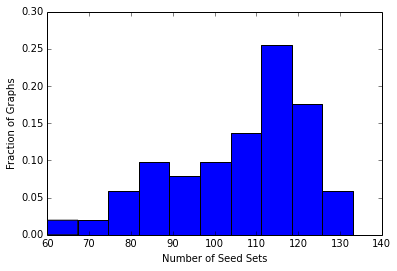

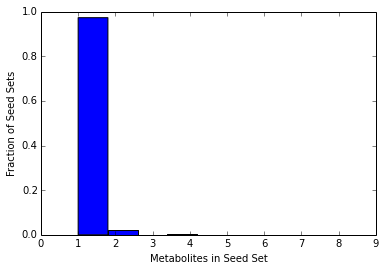

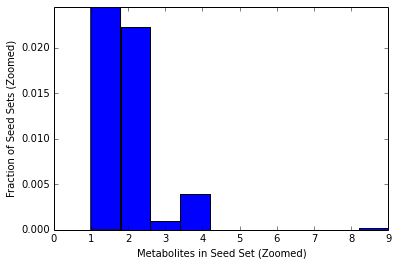

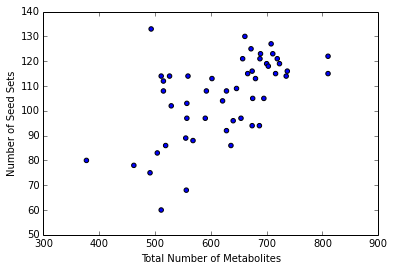

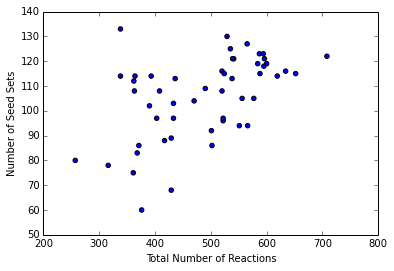

In [5]:
# Computation of seed sets.

# This code cell does a number of things. First, it computes the strongly 
# connected components (SCCs) of the reduced digraph. An SCC is a group of
#  nodes, such that from each node there exists a path to all other nodes in 
# the component. SCCs are candidates for seed sets.

# Second, SCCs are evaluated to see if they are seed sets: any SCC with no 
# outgoing edges is a seed set. This is done by converting the digraph to its 
# condensation (a new graph) in which each SCC is represented as a single
# node. 

# Third, seed sets are written to file and summary statistics are computed
# for each seed set. Additional statistics on the reduced graph and digraph
# are also computed.

# Create lists to store seed sets
# seedSetList is a list of lists. Each outer list contains all the seed sets
# for that graph.
seedSetList = []

# Iterate over the list of genome directories. For each reduced digraph, 
# identify its condensation (SCCs). For each node of the SCC, check if it
# is a seed set by computing its in-degree. If yes, append the SCC (as a list
# of nodes) to the list of seed sets. Then compute some summary statistics.
count = 0
print 'Computing Seed Sets...'

for curDir in dirList:

# Read in adjacency list and convert to digraph object
    myDiGraph = nx.read_adjlist('../'+processedDataDir+'/'+curDir+'/'+curDir+'AdjList.txt',
                                delimiter='\t', create_using=nx.DiGraph())                            

# Compute the list of SCCs for the digraph as well as its condensation
    mySCCList = list(nx.strongly_connected_components_recursive(myDiGraph))
    myCondensation = nx.condensation(myDiGraph)

# "List of lists" of seed metabolites. Each element is a list of nodes belonging
# to an SCC which is also a seed set.
    mySeeds = []    

# For each node (SCC) of the condensation, examine each its in-degree. If the
# in-degree is zero (only outgoing edges), the SCC is a seed set. Append the
# SCC (as a list of nodes) to the list of seed sets.
    for node in myCondensation.nodes():
        inDeg = myCondensation.in_degree(node)
        if inDeg == 0:
            mySeeds.append(mySCCList[node])
    seedSetList.append(mySeeds)

# Record seed metabolites for each graph. Each row of the output file contains
# the metabolites belonging to a single seed set.
    seedSets = open('../'+processedDataDir+'/'+curDir+'/'+curDir+'SeedSets.txt', 'w')
    for item in mySeeds:
        seedSets.write("%s\n" % item)
    seedSets.close()

    count = count + 1

print 'Calculation complete. Computed seed sets for %s models.' % (numSubDir)
    
# Plot summary statistics. The function plotSeedStats plots histograms of:
#   number of seed sets
#   size of seed sets
# The function plotSeedStats also plots scatter grams of the number of seed 
# sets vs the size of the original genome-scale model, either reactions or
# metabolites.
gf.plotSeedStats(seedSetList, reducedGraphStatArray, modelStatArray)

#### Working with Seed Sets

Before running any of the segments below, the following code chunk needs to be imported.





In [2]:
# Import Python packages.
import csv
import networkx as nx
import os
from collections import Counter

# Import scipy stack
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  
import scipy
import scipy.cluster.hierarchy as sch

# Define data directories
# The user should ensure these directories match their data organization scheme
# processedDataDir: directory containing a folder for each genome. The folder
# name should match the genome name, and should contain a genome-scale model
# of the genome. The model should be named 'genomeNameBalanced.xml'.
# summaryStatsDir: directory for storing summary statistics
# externalDataDir: 
processedDataDir = 'ProcessedModelFiles'
summaryStatsDir = 'DataSummaries'
externalDataDir = 'ExternalData'

# Retrieve list of genomes to process by examing the contents of 
# 'processedDataDir', ignoring hidden folders. Subsequent computations are 
# performed by iterating over this list.
dirList =[]
for item in os.listdir('../'+processedDataDir):
    if not item.startswith('.'):
        dirList.append(item)

numSubDir = len(dirList)

#### Clustering Seed Sets

Now that the seed sets for each genome have been computed, we want to analyze them. Not only do we want to look at the compounds in each seed set, but also phylogenetic patterns of the compounds. One way to get started is to perform a cluster analysis on a weighted matrix of the seed compounds. The following code snippet performs and visualizes such an analysis, using a Euclidean distance metrix and average linkage (UPGMA) clustering.

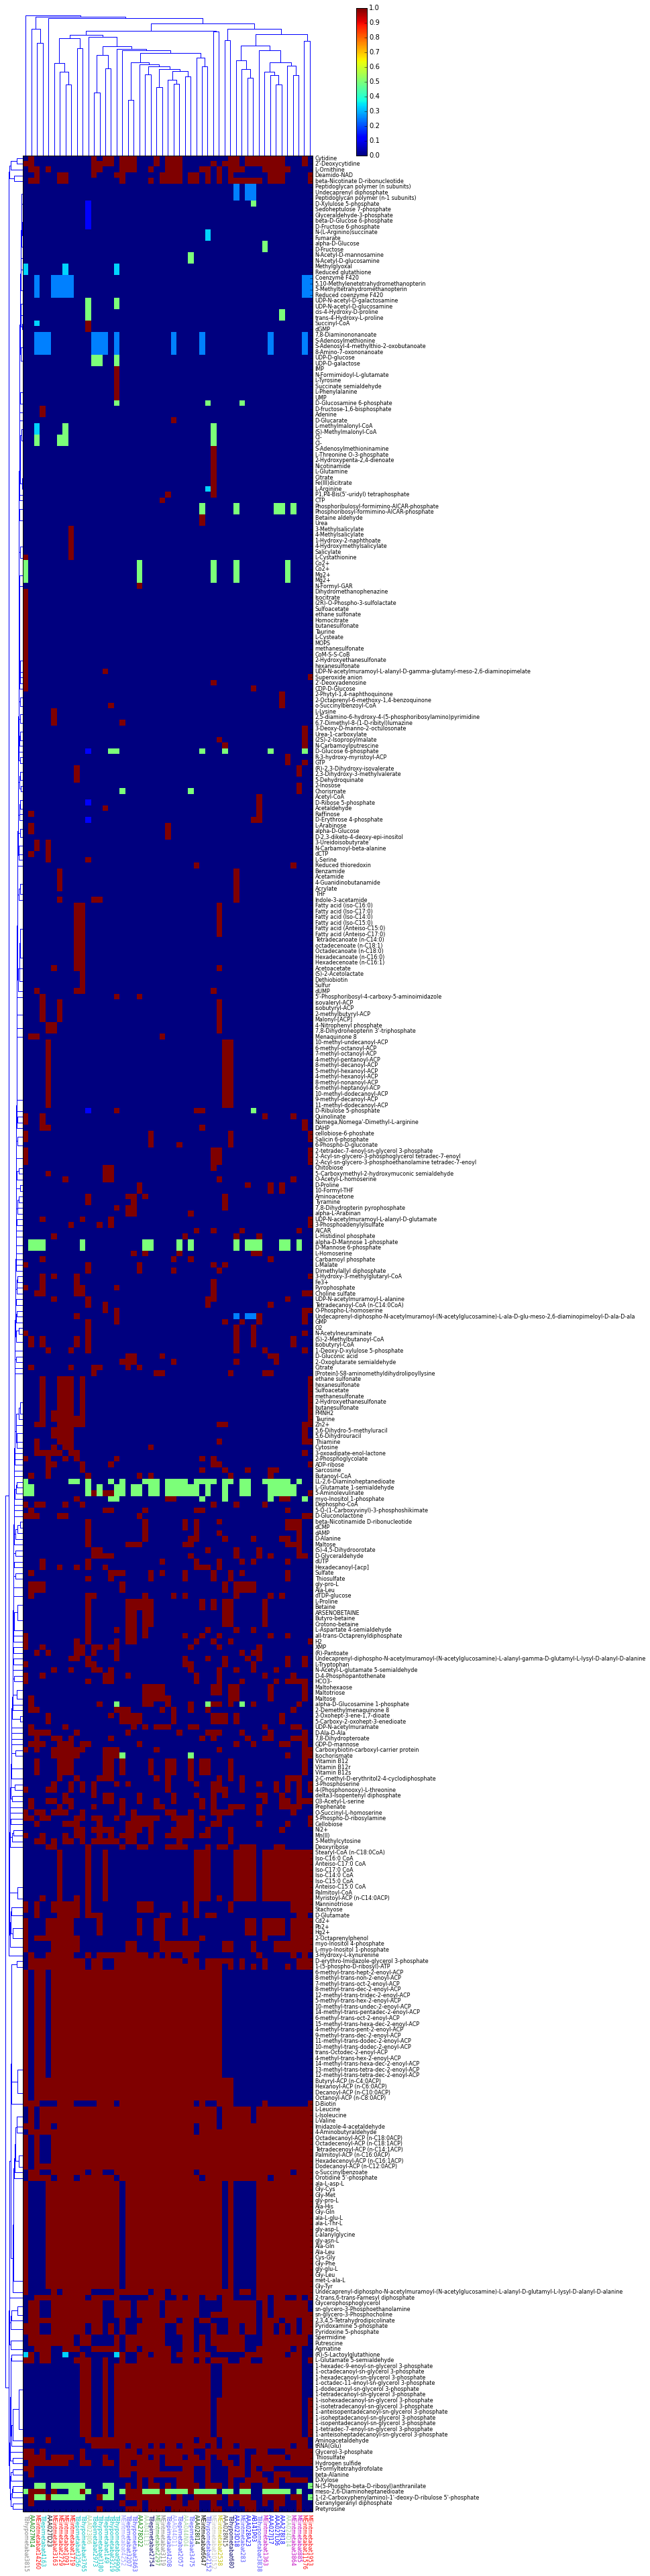

In [15]:
#%% Consolidation seed weights into a single data frame.
# This code snippet reads in the seed metabolites and their weights for each 
# genome. The data is read into a dataframe and then written to file. Structure:
# Rows: metabolites
# Columns: graphs
# Entries: unweighted seed set values

# Create a data frame to store the data
seedMatrixDF = pd.DataFrame(columns=["Metabolite"])

# Read in list of seed weights into a temporary data frame. Perform an outer
# join with the existing data frame to incorporate the new list of weights.
for curDir in dirList:
    tempDF = pd.read_csv('../'+processedDataDir+'/'+curDir+'/'+curDir+'SeedWeights.txt', names=['Metabolite',curDir])
    seedMatrixDF = pd.merge(seedMatrixDF, tempDF, how='outer', on="Metabolite")

# Replace all the NaN values with zeros
seedMatrixDF.fillna(0, inplace=True)

# Append a new column containing common names associated with metabolite IDs.
# The file metabMap.csv was created manually from the seed database, and should
# be updated to reflect the particulars of your data set.
namesDF = pd.read_csv('../'+externalDataDir+'/'+'metabMap.csv', names=['Metabolite','CommonName'])
seedMatrixDF = pd.merge(seedMatrixDF, namesDF, how='outer', on="Metabolite")

# Rearrange the order of the columns so that the common name is in front
newOrder = seedMatrixDF.columns.tolist()
newOrder = newOrder[-1:] + newOrder[:-1]
seedMatrixDF = seedMatrixDF[newOrder]
    
# Export the matrix of seed weights
pd.DataFrame.to_csv(seedMatrixDF, '../'+summaryStatsDir+'/'+'seedMatrixWeighted.csv')


#%% Clustering and Visualization of Seed Sets

# This code snippet creates a dendrogram of the seed sets. The genomes are
# clustered based on weighted vectors of seed sets, using the euclidean
# distance and UPGMA (average linkage) clustering. A second dendrogram is
# constructed based on metabolite weights across genomes. Then, the matrix
# of seed weights is reordered to reflect the order of the dendrograms and is
# visualized. Genome names are colored according to their lineage, with acI
# sub-divided into acI-A and acI-B.

# Python clustering algorithms require the data to be an ndarray, with each
# row corresponding to a set of observations. Thus, calculation of the linkage
# for the genomes must be performed on the transpose.
seedMatrix=pd.DataFrame.as_matrix(seedMatrixDF.drop(['CommonName','Metabolite'], 1))
seedMatrixT=np.transpose(pd.DataFrame.as_matrix(seedMatrixDF.drop(['CommonName','Metabolite'], 1)))

# Create a figure to display the seed weights and dendrograms.
fig = plt.figure(figsize=(7.5, 61))

# Compute and plot dendrogram for genomes, which will be above the graph.
# Define the size of the dendrogram
ax1 = fig.add_axes([0.05,0.9,0.8,0.05], frame_on=False)
# Compute the linkage matrix
genomeLinkage = sch.linkage(seedMatrixT, method='average', metric='euclidean')
# Compute the dendrogram
genomeClust = sch.dendrogram(genomeLinkage, distance_sort='True', color_threshold=0)
# No tick marks along axes
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot dendrogram for metabolites which will be beside the graph. 
# Define the size of the dendrogram
ax2 = fig.add_axes([0,0.1,0.05,0.8], frame_on=False)
# Compute the linkage matrix
metabLinkage = sch.linkage(seedMatrix, method='average', metric='euclidean')
# Compute the dendrogram
metabClust = sch.dendrogram(metabLinkage, orientation='right', color_threshold=0)
# No tick marks along axes
ax2.set_xticks([])
ax2.set_yticks([])

# Plot the matrix of seed weights.
# Define the size of the plot
axmatrix = fig.add_axes([0.05,0.1,0.8,0.8])
# Determine ordering of the dendrograms and rearrange the weight matrix
idx1 = genomeClust['leaves']
idx2 = metabClust['leaves']
seedMatrix = seedMatrix[:,idx1]
seedMatrix = seedMatrix[idx2,:]
# Plot the weight matrix
im = axmatrix.matshow(seedMatrix, aspect='auto', origin='lower')
# No tick marks along axes
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Import coloration info to map to genome names. Rearrange to same order as
# leaves of the dendrogram and extract the 'Color' column as a list.
# The file 'actinoColors.csv' will need to be updated for the specific samples.
genomeColors = pd.read_csv('../'+externalDataDir+'/'+'actinoColors.csv')
genomeColors = genomeColors['Color'].tolist()
genomeColors = [ genomeColors[i] for i in idx1]

# Add genome names to the bottom axis
axmatrix.set_xticks(range(len(seedMatrixT)))
axmatrix.set_xticklabels([dirList[i] for i in idx1], minor=False)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()
plt.xticks(rotation=-90, fontsize=8)
for xtick, color in zip(axmatrix.get_xticklabels(), genomeColors):
    xtick.set_color(color)

# Add metabolite names to the right axis
axmatrix.set_yticks(range(len(seedMatrix)))
axmatrix.set_yticklabels([seedMatrixDF['CommonName'][i] for i in idx2], minor=False)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()
plt.yticks(fontsize=8)

# Plot colorbar.
axcolor = fig.add_axes([0.97,0.9,0.03,0.05])
plt.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('../'+summaryStatsDir+'/'+'seedSetDendrogram.png')

Genomes in the above clustergram are colored as follows:

acI-A: shades of green for different tribes  
acI-B: shades of blue for different tribes  
acI, other: magenta  
acIII: yellow  
acIV: red  
acV: cyan  
acSTL: black  
acTH1: light gray  
acTH2: dark gray  
Unknown: intermediate gray  

My initial observations: the clustering is strongly influenced by a small fraction of the compounds, mainly fatty acids and diamines, which are present/absent in a large number of graphs. Given that these are absent in genomes spanning a range of taxa, I suspect this is an artifact of (in)completeness. With the FAs in particular, it is likely that KBase is mapping a single gene to multiple FAs, as a single fatty acid synthase protein can act on FAs of many lengths.

Some obvious next steps include:
* Merge genomes (graphs) belonging to the same taxa and see how the heatmap looks.
* Remove fatty acids and diamines from the seed sets and repeat the clustering.

The reverse ecology paper by Borenstein et al PNAS 2008 discusses some algorithms to infer phylogeny from seed sets. I will use those algorithms to cluster the genomes as well.

The clustering itself is hard to visualize because the heatmap is so large. Just draw the dendrogram with labels.

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axis.py:1004 UserWarning: Unable to find pixel distance along axis for interval padding; assuming no interval padding needed.
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axis.py:1011 UserWarning: Unable to find pixel distance along axis for interval padding; assuming no interval padding needed.


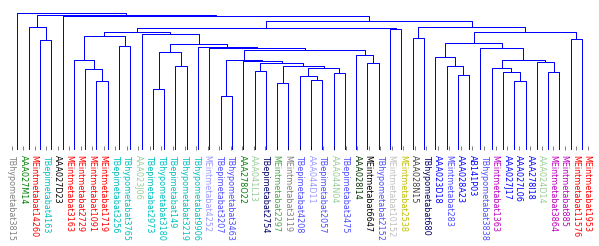

In [8]:
#%% Clustering - visualize dendrogam only

# Create a figure to display the seed weights and dendrograms.
fig = plt.figure(figsize=(8,2))

# Compute and plot dendrogram for genomes, which will be above the graph.
# Define the size of the dendrogram
ax1 = fig.add_axes([0, 0, 1, 1], frame_on=False)
# Compute the linkage matrix
genomeLinkage = sch.linkage(seedMatrixT, method='average', metric='euclidean')
# Compute the dendrogram
genomeClust = sch.dendrogram(genomeLinkage, distance_sort='True', color_threshold=0)
# No tick marks along axes
ax1.set_xticks([])
ax1.set_yticks([])

# Add genome names to the bottom axis
ax2 = fig.add_axes([0, 0, 1, 0], frame_on=False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xticks(range(len(seedMatrixT)))
ax2.set_xticklabels([dirList[i] for i in idx1], minor=False)
ax2.xaxis.set_label_position('bottom')
ax2.xaxis.tick_bottom()
plt.xticks(rotation=-90, fontsize=8)
for xtick, color in zip(ax2.get_xticklabels(), genomeColors):
    xtick.set_color(color)

Here is the coloring again:

acI-A: blue  
acI-B: green  
acI, other: magenta  
acIII: yellow  
acIV: red  
acV: cyan  
acSTL: black  
acTH1: light gray  
acTH2: dark gray  
Unknown: intermediate gray  

#### Computation of Metabolic Competition

I would also like to compute the metabolic competition scores between all pairs of SAGs and GFMs. Clustering the genomes based on these scores could potential competitive interactions between tribes.

In [16]:
# This segment computes the MII between all pairs of genomes. A nested loop
# is used to iterate all over all pairs of genomes, and a dataframe is used to
# store the MII for each pair. First, the weighted seed sets for each genome
# are read into dataframes. The overlap between sets is performed using an
# inner join on the two seed sets. The inner join contains seed weights for
# both genomes; weights from the first genome are used when computing the MII.
# The MII is then computed as the ratio of two weighted sums: the seed set
# overlap between A and B, and the seed set of A. After all pairwise scores 
# are computed, the output is written to file.

# Establish a matrix to store MII scores
metabCompete = pd.DataFrame(np.zeros((numSubDir, numSubDir)), index=dirList, columns=dirList)

# Use a nested loop to loop over all genome pairs. outerDir coresponds to
# organism A and innerDir to organism B
for outerDir in dirList:
    for innerDir in dirList:
# Read in the list of seed sets and their weights for organisms A and B
        seedWeightOuter = pd.read_csv('../'+processedDataDir+'/'+outerDir+'/'+outerDir+'SeedWeights.txt', 
                                      header=None, names=['Metabolite', 'Outer Weight'])
        seedWeightInner = pd.read_csv('../'+processedDataDir+'/'+innerDir+'/'+innerDir+'SeedWeights.txt', 
                                      header=None, names=['Metabolite', 'Inner Weight'])
# Compute the overlap between seed sets using an inner join
        overlapSeeds = pd.merge(seedWeightOuter, seedWeightInner, on='Metabolite')
# Sum seed compound weights for the overlap between A and B
        upperSum = overlapSeeds.loc[:,'Outer Weight'].sum()
# Sum seed compound weights for the seed set of A
        lowerSum = seedWeightOuter.loc[:,'Outer Weight'].sum()
# The MII is the ratio of these two values. Compute and store.
        metabCompete.loc[outerDir, innerDir] = upperSum / lowerSum

# When loop complete, write to file
metabCompete.to_csv('../'+summaryStatsDir+'/'+'MetabolicCompetitionScores.csv')   

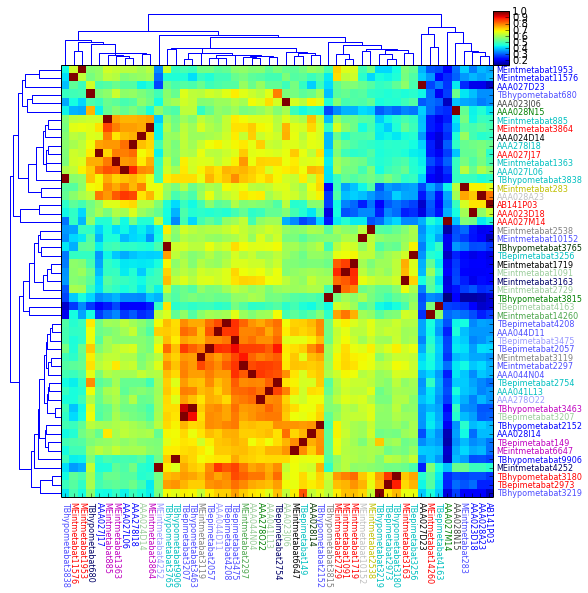

In [17]:
# This code snippet creates a dendrogram of the metabolic competition scores.
# The genomes are clustered using the euclidean distance and UPGMA (average 
# linkage) clustering. Because the scores are non-symmetric, each axis will
# have separate clustering. Genome names are colored according to their 
# lineage, with acI sub-divided into acI-A and acI-B.

# Python clustering algorithms require the data to be an ndarray, with each
# row corresponding to a set of observations.
competeMatrix=pd.DataFrame.as_matrix(metabCompete)
competeMatrixT=np.transpose(pd.DataFrame.as_matrix(metabCompete))

# Create a figure to display the seed weights and dendrograms.
fig = plt.figure(figsize=(7.5, 7.5))

# Compute and plot the first dendrogram, which will be above the graph.
# Define the size of the dendrogram
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.1], frame_on=False)
# Compute the linkage matrix
firstLinkage = sch.linkage(competeMatrixT, method='average', metric='euclidean')
# Compute the dendrogram
firstClust = sch.dendrogram(firstLinkage, distance_sort='True', color_threshold=0)
# No tick marks along axes
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot the second dendrogram, which will be beside the graph.
# Define the size of the dendrogram
ax2 = fig.add_axes([0, 0.1, 0.1, 0.8], frame_on=False)
# Compute the linkage matrix
secondLinkage = sch.linkage(competeMatrix, method='average', metric='euclidean')
# Compute the dendrogram
secondClust = sch.dendrogram(secondLinkage, orientation='right', color_threshold=0)
# No tick marks along axes
ax2.set_xticks([])
ax2.set_yticks([])

# Plot the matrix of competition scores
# Define the size of the plot
axmatrix = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Determine ordering of the dendrograms and rearrange the weight matrix
idx1 = firstClust['leaves']
idx2 = secondClust['leaves']
competeMatrix = competeMatrix[:,idx1]
competeMatrix = competeMatrix[idx2,:]
# Plot the weight matrix
im = axmatrix.matshow(competeMatrix, aspect='auto', origin='lower')
# No tick marks along axes
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Import coloration info to map to genome names. Rearrange to same order as
# leaves of the dendrogram and extract the 'Color' column as a list.
# The file 'actinoColors.csv' will need to be updated for the specific samples.
genomeColors = pd.read_csv('../'+externalDataDir+'/'+'actinoColors.csv')
genomeColors = genomeColors['Color'].tolist()
genomeColors = [ genomeColors[i] for i in idx1]

# Add genome names to the bottom axis
axmatrix.set_xticks(range(len(competeMatrixT)))
axmatrix.set_xticklabels([dirList[i] for i in idx1], minor=False)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()
plt.xticks(rotation=-90, fontsize=8)
for xtick, color in zip(axmatrix.get_xticklabels(), genomeColors):
    xtick.set_color(color)

# Add genome names to the right axis
axmatrix.set_yticks(range(len(competeMatrix)))
axmatrix.set_yticklabels([dirList[i] for i in idx2], minor=False)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()
plt.yticks(fontsize=8)
for ytick, color in zip(axmatrix.get_yticklabels(), genomeColors):
    ytick.set_color(color)

# Plot colorbar.
axcolor = fig.add_axes([0.9, 0.9, 0.03, 0.1])
plt.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('../'+summaryStatsDir+'/'+'metabolicCompetition.png')

#### Computation of Metabolic Complementarity

I would also like to compute the metabolic complementarity scores between all pairs of SAGs and GFMs. Clustering the genomes based on these scores could potential cooperative interactions between tribes.

In [5]:
# This segment computes the MCI between all pairs of genomes. A nested loop
# is used to iterate all over all pairs of genomes, and a dataframe is used to
# store the MCI for each pair. First, the weighted seed sets for each genome
# are read into dataframes. Then, the metabolic network of B is read in as a 
# digraph and convert to a dataframe. The list of non-seed compounds for
# organism B is computed from these two dataframes. Then, the overlap between 
# A's seed compounds and B's non-seed compounds is performed using an inner 
# join on the two seed sets. The MCI is then computed as the ratio of two
# sizes: the size of A's seed set, and the size of the overlap with B's non-
# seeds. After all pairwise scores are computed, the output is written to file.

# Establish a matrix to store MCI scores
metabComplement = pd.DataFrame(np.zeros((numSubDir, numSubDir)), index=dirList, columns=dirList)

# Use a nested loop to loop over all genome pairs. outerDir coresponds to
# organism A and innerDir to organism B
for outerDir in dirList:
    for innerDir in dirList:
# Read in the list of seed sets and their weights for organisms A and B
        seedWeightOuter = pd.read_csv('../'+processedDataDir+'/'+outerDir+'/'+outerDir+'SeedWeights.txt', header=None, names=['Metabolite', 'Outer Weight'])
# Read in the lists of seed compounds and all compounds for the inner genome
        seedWeightInner = pd.read_csv('../'+processedDataDir+'/'+innerDir+'/'+innerDir+'SeedWeights.txt', header=None, names=['Metabolite', 'Inner Weight'])
# Read in the metabolic network of B via its adjancency list representation and
# converts it to a pandas Dataframe. First, the list of nodes is extracted from
# the graph. The list is then converted to a pandas Series, embedded in a dict,
# and used to create a dataframe of the nodes.
        allNodesInner = pd.DataFrame({'Metabolite' : pd.Series(nx.read_adjlist('../'+processedDataDir+'/'+innerDir+'/'+innerDir+'AdjList.txt',delimiter='\t', create_using=nx.DiGraph()).nodes())})
# Compute the list of non-seed compounds for organisms B
        nonSeedsInner = allNodesInner[~allNodesInner.Metabolite.isin(seedWeightInner.Metabolite)]
# Compute the overlap between A's seeds and B's non-seeds
        overlapSeeds = pd.merge(seedWeightOuter, nonSeedsInner, on='Metabolite')
# Compute the ratio of these two sets
        metabComplement.loc[outerDir, innerDir] = float(len(overlapSeeds)) / float(len(seedWeightOuter))

# When loop complete, write to file
metabComplement.to_csv('../'+summaryStatsDir+'/'+'MetabolicComplementarityScores.csv')

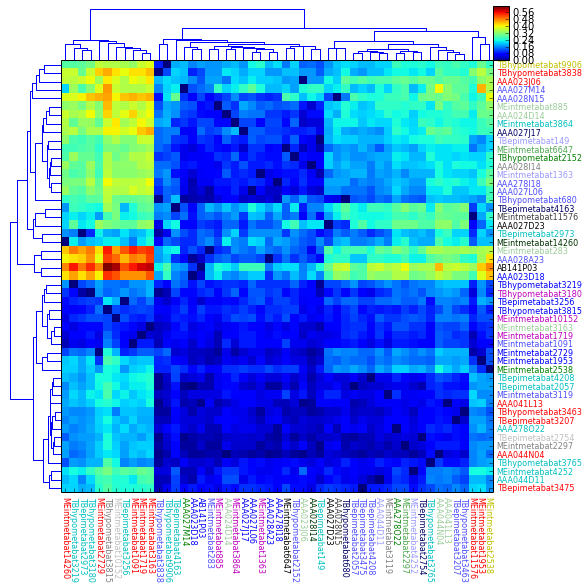

In [6]:
# This code snippet creates a dendrogram of the metabolic complementarity 
# scores. The genomes are clustered using the euclidean distance and UPGMA 
# (average linkage) clustering. Because the scores are non-symmetric, each 
# axis will have separate clustering. Genome names are colored according to 
# their lineage, with acI sub-divided into acI-A and acI-B.

# Python clustering algorithms require the data to be an ndarray, with each
# row corresponding to a set of observations.
complementMatrix=pd.DataFrame.as_matrix(metabComplement)
complementMatrixT=np.transpose(pd.DataFrame.as_matrix(metabComplement))

# Create a figure to display the seed weights and dendrograms.
fig = plt.figure(figsize=(7.5, 7.5))

# Compute and plot the first dendrogram, which will be above the graph.
# Define the size of the dendrogram
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.1], frame_on=False)
# Compute the linkage matrix
firstLinkage = sch.linkage(complementMatrixT, method='average', metric='euclidean')
# Compute the dendrogram
firstClust = sch.dendrogram(firstLinkage, distance_sort='True', color_threshold=0)
# No tick marks along axes
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot the second dendrogram, which will be beside the graph.
# Define the size of the dendrogram
ax2 = fig.add_axes([0, 0.1, 0.1, 0.8], frame_on=False)
# Compute the linkage matrix
secondLinkage = sch.linkage(complementMatrix, method='average', metric='euclidean')
# Compute the dendrogram
secondClust = sch.dendrogram(secondLinkage, orientation='right', color_threshold=0)
# No tick marks along axes
ax2.set_xticks([])
ax2.set_yticks([])

# Plot the matrix of competition scores
# Define the size of the plot
axmatrix = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Determine ordering of the dendrograms and rearrange the weight matrix
idx1 = firstClust['leaves']
idx2 = secondClust['leaves']
complementMatrix = complementMatrix[:,idx1]
complementMatrix = complementMatrix[idx2,:]
# Plot the weight matrix
im = axmatrix.matshow(complementMatrix, aspect='auto', origin='lower')
# No tick marks along axes
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Import coloration info to map to genome names. Rearrange to same order as
# leaves of the dendrogram and extract the 'Color' column as a list.
# The file 'actinoColors.csv' will need to be updated for the specific samples.
genomeColors = pd.read_csv('../'+externalDataDir+'/'+'actinoColors.csv')
genomeColors = genomeColors['Color'].tolist()
genomeColors = [ genomeColors[i] for i in idx1]

# Add genome names to the bottom axis
axmatrix.set_xticks(range(len(complementMatrixT)))
axmatrix.set_xticklabels([dirList[i] for i in idx1], minor=False)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()
plt.xticks(rotation=-90, fontsize=8)
for xtick, color in zip(axmatrix.get_xticklabels(), genomeColors):
    xtick.set_color(color)

# Add genome names to the right axis
axmatrix.set_yticks(range(len(complementMatrix)))
axmatrix.set_yticklabels([dirList[i] for i in idx2], minor=False)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()
plt.yticks(fontsize=8)
for ytick, color in zip(axmatrix.get_yticklabels(), genomeColors):
    ytick.set_color(color)

# Plot colorbar.
axcolor = fig.add_axes([0.9, 0.9, 0.03, 0.1])
plt.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('../'+summaryStatsDir+'/'+'metabolicComplementarity.png')

#### TO DO:
2. Perform a detailed analysis of the seed sets. Compare to what we know about acI from Sarahi and Trevor's papers.
4. Write code to calculate scope.
5. Write code to compute metrics which depend on both seed and scope.


#### TO DO:
1. Rewrite workflow so each code cell can be called as a self-contained script. This will ensure that the results in this notebook stay consistent with my development pipeline.
